<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(3_2)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.2_n250.csv',
 'data_multi_delta_3.2_n120.csv',
 'data_multi_delta_3.2_n60.csv',
 'data_multi_delta_3.2_n30.csv',
 'data_multi_delta_3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,94.943319,50.096682,45.386214,67.082823,267.509038,411.471363,-143.962325
1,0.0,1.0,88.689014,48.612073,48.522257,54.828272,250.651617,395.521202,-144.869586
2,0.0,2.0,73.744622,42.327221,61.343432,156.662999,344.078273,364.669482,-20.591209
3,0.0,3.0,69.709361,29.474749,70.307790,188.505539,367.997439,459.721270,-91.723831
4,0.0,4.0,60.926978,72.075122,81.116831,-728.200215,-504.081285,-106.300542,-397.780742
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,62.841767,40.512818,37.257680,729.603821,880.216085,615.165115,265.050970
19996,999.0,16.0,28.148818,48.465979,36.464069,128.592095,251.670962,83.395484,168.275477
19997,999.0,17.0,26.234311,35.414945,45.854643,499.816925,617.320824,-200.729629,818.050453
19998,999.0,18.0,53.083023,29.263030,76.460809,48.461633,217.268494,-65.207138,282.475632


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,94.943319,50.096682,45.386214,67.082823,267.509038,411.471363,-143.962325
1,0.0,1.0,88.689014,48.612073,48.522257,54.828272,250.651617,395.521202,-144.869586
2,0.0,2.0,73.744622,42.327221,61.343432,156.662999,344.078273,364.669482,-20.591209
3,0.0,3.0,69.709361,29.474749,70.307790,188.505539,367.997439,459.721270,-91.723831
4,0.0,4.0,60.926978,72.075122,81.116831,-728.200215,-504.081285,-106.300542,-397.780742
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,62.841767,40.512818,37.257680,729.603821,880.216085,615.165115,265.050970
19996,999.0,16.0,28.148818,48.465979,36.464069,128.592095,251.670962,83.395484,168.275477
19997,999.0,17.0,26.234311,35.414945,45.854643,499.816925,617.320824,-200.729629,818.050453
19998,999.0,18.0,53.083023,29.263030,76.460809,48.461633,217.268494,-65.207138,282.475632


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    94.943319  50.096682  ...  411.471363  -143.962325
      1.0    88.689014  48.612073  ...  395.521202  -144.869586
      2.0    73.744622  42.327221  ...  364.669482   -20.591209
      3.0    69.709361  29.474749  ...  459.721270   -91.723831
      4.0    60.926978  72.075122  ... -106.300542  -397.780742
...                ...        ...  ...         ...          ...
999.0 15.0   62.841767  40.512818  ...  615.165115   265.050970
      16.0   28.148818  48.465979  ...   83.395484   168.275477
      17.0   26.234311  35.414945  ... -200.729629   818.050453
      18.0   53.083023  29.263030  ...  -65.207138   282.475632
      19.0   39.020234  94.549775  ...  695.868981  1693.150921

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    94.943319  50.096682  ...  411.471363  -143.962325
      1.0    88.689014  48.612073  ...  395.521202  -144.869586
      2.0    73.744622  42.327221  ...  364.669482   -20.591209
      3.0    69.709361  29.474749  ...  459.721270   -91.723831
      4.0    60.926978  72.075122  ... -106.300542  -397.780742
...                ...        ...  ...         ...          ...
999.0 15.0   62.841767  40.512818  ...  615.165115   265.050970
      16.0   28.148818  48.465979  ...   83.395484   168.275477
      17.0   26.234311  35.414945  ... -200.729629   818.050453
      18.0   53.083023  29.263030  ...  -65.207138   282.475632
      19.0   39.020234  94.549775  ...  695.868981  1693.150921

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,94.943319,50.096682,45.386214,67.082823,267.509038,411.471363,-143.962325
1,0.0,1.0,88.689014,48.612073,48.522257,54.828272,250.651617,395.521202,-144.869586
2,0.0,2.0,73.744622,42.327221,61.343432,156.662999,344.078273,364.669482,-20.591209
3,0.0,3.0,69.709361,29.474749,70.307790,188.505539,367.997439,459.721270,-91.723831
4,0.0,4.0,60.926978,72.075122,81.116831,-728.200215,-504.081285,-106.300542,-397.780742
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,62.841767,40.512818,37.257680,729.603821,880.216085,615.165115,265.050970
19996,999.0,16.0,28.148818,48.465979,36.464069,128.592095,251.670962,83.395484,168.275477
19997,999.0,17.0,26.234311,35.414945,45.854643,499.816925,617.320824,-200.729629,818.050453
19998,999.0,18.0,53.083023,29.263030,76.460809,48.461633,217.268494,-65.207138,282.475632


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    94.943319  50.096682  ...  411.471363  -143.962325
      1.0    88.689014  48.612073  ...  395.521202  -144.869586
      2.0    73.744622  42.327221  ...  364.669482   -20.591209
      3.0    69.709361  29.474749  ...  459.721270   -91.723831
      4.0    60.926978  72.075122  ... -106.300542  -397.780742
...                ...        ...  ...         ...          ...
999.0 15.0   62.841767  40.512818  ...  615.165115   265.050970
      16.0   28.148818  48.465979  ...   83.395484   168.275477
      17.0   26.234311  35.414945  ... -200.729629   818.050453
      18.0   53.083023  29.263030  ...  -65.207138   282.475632
      19.0   39.020234  94.549775  ...  695.868981  1693.150921

[20000 rows x 7 columns]

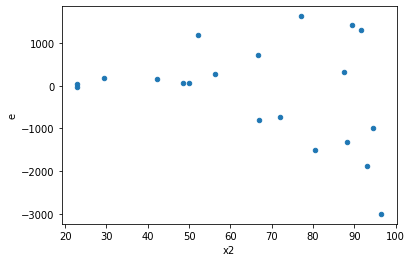

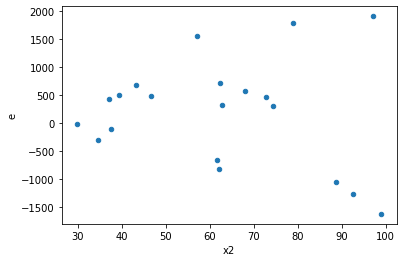

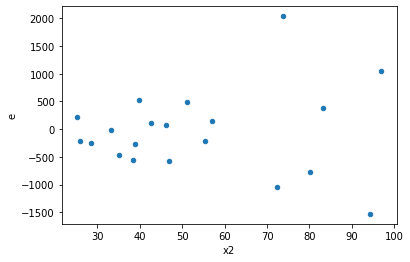

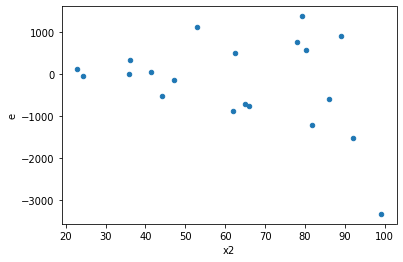

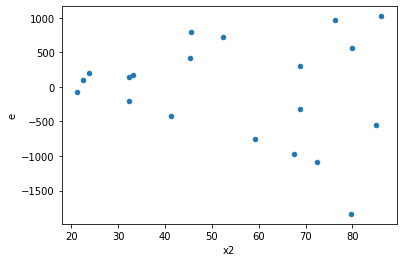

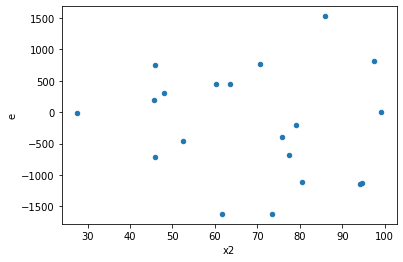

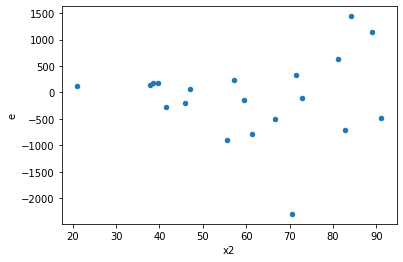

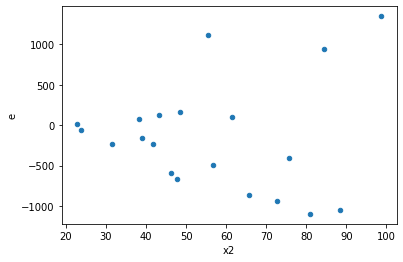

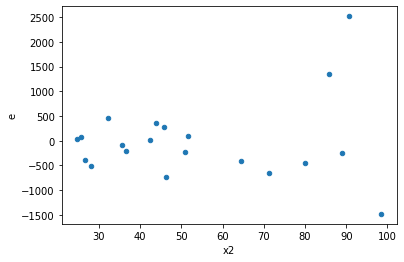

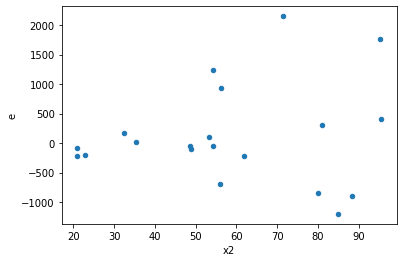

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,5.0,5.0,214828.75903065153,11135145.22302535,42965.751806130305,2227029.04460507,51.83265626664351,0.0005246963051144249,0.9997376518474428,0.00026234815255721244,Reject001=0 : Heteroscedasticity
1.0,5.0,5.0,464166.39144991926,10639177.199327035,92833.27828998385,2127835.439865407,22.92104166803929,0.0037097430579700053,0.998145128471015,0.0018548715289850026,Reject001=0 : Heteroscedasticity
2.0,5.0,5.0,706700.4727808322,9066063.051719952,141340.09455616644,1813212.6103439904,12.828720796019043,0.014111332886244554,0.9929443335568777,0.007055666443122277,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,752182.2726339318,3173321.0885193786,150436.45452678637,634664.2177038757,4.218819299486142,0.14014461805135214,0.9299276909743239,0.07007230902567607,Reject001=1 : Homoscedasticity
4.0,5.0,5.0,429252.8359856439,4120476.42174399,85850.56719712878,824095.284348798,9.599182757366329,0.026759187506978588,0.9866204062465107,0.013379593753489294,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,3558000.9813951193,6008853.72709226,711600.1962790239,1201770.745418452,1.6888285749533836,0.5792221728304208,0.7103889135847896,0.2896110864152104,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,455352.34726851725,5455985.894039336,91070.46945370345,1091197.1788078672,11.981899131008518,0.016438606679334278,0.9917806966603329,0.008219303339667139,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,134586.08317431321,4403049.499057122,26917.21663486264,880609.8998114243,32.71548881732727,0.0015940884782108533,0.9992029557608946,0.0007970442391054267,Reject001=0 : Heteroscedasticity
8.0,5.0,5.0,418849.29969684716,6335629.413957549,83769.85993936943,1267125.8827915099,15.12627433910746,0.009721017310583058,0.9951394913447085,0.004860508655291529,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,214828.75903065153,11135145.22302535,42965.751806130305,2227029.04460507,51.83265626664351,0.0005246963051144249,Reject001=0 : Heteroscedasticity
1.0,5.0,5.0,464166.39144991926,10639177.199327035,92833.27828998385,2127835.439865407,22.92104166803929,0.0037097430579700053,Reject001=0 : Heteroscedasticity
2.0,5.0,5.0,706700.4727808322,9066063.051719952,141340.09455616644,1813212.6103439904,12.828720796019043,0.014111332886244554,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,752182.2726339318,3173321.0885193786,150436.45452678637,634664.2177038757,4.218819299486142,0.14014461805135214,Reject001=1 : Homoscedasticity
4.0,5.0,5.0,429252.8359856439,4120476.42174399,85850.56719712878,824095.284348798,9.599182757366329,0.026759187506978588,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,3558000.9813951193,6008853.72709226,711600.1962790239,1201770.745418452,1.6888285749533836,0.5792221728304208,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,455352.34726851725,5455985.894039336,91070.46945370345,1091197.1788078672,11.981899131008518,0.016438606679334278,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,134586.08317431321,4403049.499057122,26917.21663486264,880609.8998114243,32.71548881732727,0.0015940884782108533,Reject001=0 : Heteroscedasticity
8.0,5.0,5.0,418849.29969684716,6335629.413957549,83769.85993936943,1267125.8827915099,15.12627433910746,0.009721017310583058,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      556
Reject001=0 : Heteroscedasticity    444
Name: Result_test, dtype: int64